In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df= pd.read_csv("data.csv")

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
target_col = "Target"

In [6]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [7]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels

In [8]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [9]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.88e-69
Time:                        18:40:11   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [11]:
X_test = sm.add_constant(X_test)

In [12]:
y_pred = results.predict(X_test)

In [13]:
residual = y_test - y_pred

# No Multicolinearity

In [20]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


In [16]:
vif = [variance_inflation_factor(X_train.values, i ) for i in range(X_train.shape[1])]

In [14]:
X_train.shape[1]

3

In [15]:
X_train.values

array([[284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [177. ,  33.4,  38.7],
       [125.7,  36.9,  79.2],
       [209.6,  20.6,  10.7],
       [142.9,  29.3,  12.6],
       [184.9,  43.9,   1.7],
       [222.4,   4.3,  49.8],
       [241.7,  38. ,  23.2],
       [ 17.2,  45.9,  69.3],
       [120.5,  28.5,  14.2],
       [ 89.7,   9.9,  35.7],
       [191.1,  28.7,  18.2],
       [ 75.5,  10.8,   6. ],
       [193.2,  18.4,  65.7],
       [ 85.7,  35.8,  49.3],
       [266.9,  43.8,   5. ],
       [ 39.5,  41.1,   5.8],
       [261.3,  42.7,  54.7],
       [ 13.2,  15.9,  49.6],
       [193.7,  35.4,  75.6],
       [296.4,  36.3, 100.9],
       [26

In [17]:
vif

[2.6976786689636088, 3.473818052574502, 3.162643016014367]

In [18]:
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns)

,vif
Feature 1,2.697679
Feature 2,3.473818
Feature 3,3.162643


In [19]:
X_train.columns

Index(['Feature 1', 'Feature 2', 'Feature 3'], dtype='object')

In [21]:
vif[0:]

[2.6976786689636088, 3.473818052574502, 3.162643016014367]

### so, all the features having VIF <5, are kind of having independent relationship among them. 
### so, assumption of multicollinearilty holds true here.

# Normality of Residuals

<AxesSubplot:ylabel='Density'>

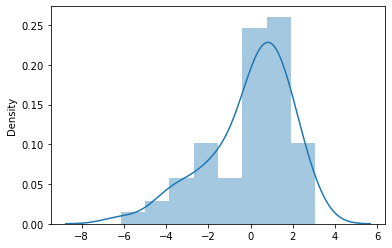

In [23]:
sns.distplot(residual)

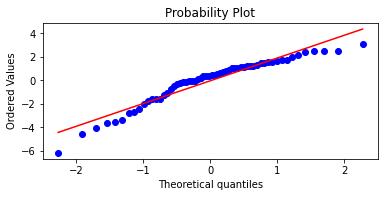

In [37]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

### Fit=True, Fit a least-squares regression (best-fit) line to the sample data if True (default).

In [27]:
np.mean(residual)

-0.03848895253439703

### distribution is almost normal, which can be seen from Q-Q plot as well as mean value of the residuals which is near about zero.

# Homoskedasticty or constant variance

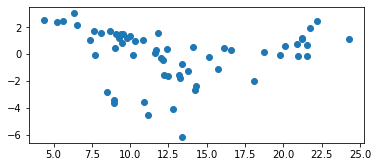

In [28]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

### there is no such kind of pattern of the residuals, also most of the values lie around the centre value which the zero value. 

# No autocorrelation of residuals

### 1.alpha=.05, 95 % confidence intervals are returned where the standard deviation is computed according to Bartlett’s formula.  2.An int or array of lag values, used on horizontal axis.

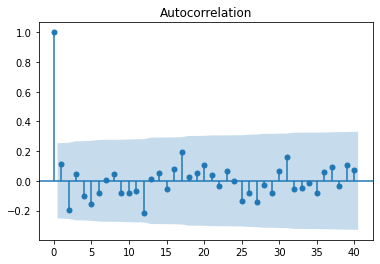

In [35]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### rediuals with itself are having correlation values as 1 but other than that, no values are crossing the shaded region.so we can say no autocorrelation between residuals hold true here. 